In [1]:
import re
import csv
import pprint 
import time
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
from nltk import word_tokenize, pos_tag
from sklearn.pipeline import Pipeline
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

In [3]:
def extract_sentences(trainFile, classesFile):    
    cleanedTrainFile = trainFile.copy()
    del cleanedTrainFile[7561] # delete weird lines e.g.: [7],The
    del cleanedTrainFile[10422] # [3],...
    
    tags_list = []
    sentence_list = []
    i = 0
    for i, line in enumerate(cleanedTrainFile):
        splitLine = line.split("\",")
        
        # extract the POS embeddings [0]
        tagsString = splitLine[0].replace("\"", "").replace("[","").replace("]","")
        tags = tagsString.split(", ")
        tags_list.append(tags)
        
        # extract the sentence [1]
        sentence = splitLine[1].strip("\"") # from 2nd elem to second last, to remove the extra "
        sentence_list.append(sentence)
        
    return tags_list, sentence_list

# Plotting WordClouds

Read in Data
---

In [4]:
y = []
with open('../databunch/train.csv') as train_file:
    y = train_file.read().splitlines()
    
print("There are {} rows of data".format(len(y)))
print("Here is a sample line:\n\t{}".format(y[0]))

with open('../databunch/classes.txt') as classes_file:
    classes = classes_file.read().splitlines()
print(list(classes))

There are 35967 rows of data
Here is a sample line:
	"[16, 16, 9, 16, 15, 16, 16, 31, 16, 9, 7, 16, 35, 7, 15, 28, 30, 16, 2]",Joint Chiefs of Staff Chairman Mike Mullen said Sunday that the U.S. has a plan to strike Iran .
['$', ',', '.', ':', ';', 'CC', 'CD', 'DT', 'EX', 'IN', 'JJ', 'JJR', 'JJS', 'LRB', 'MD', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'RRB', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', '``']


Data Preprocessing
---

In [5]:
sentences_list[0]

NameError: name 'sentences_list' is not defined

In [6]:
processed_sentences = extract_sentences(y, classes)
tags_list = processed_sentences[0]
sentences_list = processed_sentences[1]

# make a string that contains all sentences
all_sentence = ''
for s in sentences_list:
    all_sentence += s
    
# make a string that contains all tags
all_tags_list = []
for tags in tags_list:
    tags_str = ",".join(tags)
    all_tags_list.append(tags_str)
all_tags = ",".join(all_tags_list)
#all_tags

In [7]:
words = all_sentence.split()
words = [w.lower() for w in words]
stemmer = PorterStemmer()
stemmed = [stemmer.stem(w) for w in words]

WordCloud for words
---

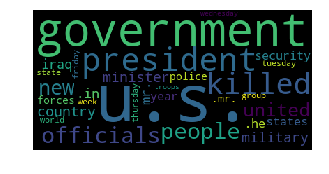

In [8]:
wordcloud = WordCloud()
picky_words = ['.the', ',', '\'s', 'said', 'says', 'say', '\"\"', '.a']
goodwords = [w for w in words if w not in ENGLISH_STOP_WORDS if w not in picky_words]

goodctr = Counter(goodwords)
wtuples = goodctr.most_common(30)
wdict = dict(wtuples)

wordcloud = WordCloud()
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(5, 3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

WordCloud for Labels
---

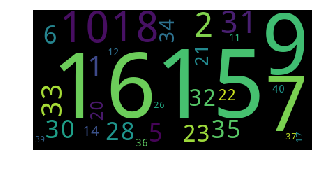

Counter({'16': 98458,
         '9': 91021,
         '15': 109352,
         '31': 29499,
         '7': 73925,
         '35': 18673,
         '28': 17314,
         '30': 18165,
         '2': 35874,
         '18': 56813,
         '1': 24524,
         '36': 2727,
         '40': 2841,
         '34': 12069,
         '23': 15208,
         '10': 58916,
         '21': 9937,
         '32': 14406,
         '14': 5204,
         '33': 24258,
         '39': 1579,
         '5': 17791,
         '20': 8311,
         '37': 1907,
         '6': 18545,
         '12': 2255,
         '24': 791,
         '22': 6518,
         '11': 2273,
         '17': 1865,
         '8': 513,
         '26': 1874,
         '0': 858,
         '19': 109,
         '3': 599,
         '4': 141,
         '13': 499,
         '27': 499,
         '25': 211,
         '38': 78,
         '29': 21})

In [10]:
tags = all_tags.split(',')
classctr = Counter(tags)
wtuples = classctr.most_common(30)
wdict = dict(wtuples)

wordcloud = WordCloud()
wordcloud.fit_words(wdict)

fig=plt.figure(figsize=(5, 3))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

|#|POS|
|---|---|
|15| Proper noun, plural|
|16| Predeterminer|
|9| Adjective, superlative|
|7| Adjective|
|10| List item marker|

In [22]:
sum = 0
for tag in classctr:
    sum = sum + classctr[tag]
sum
  
dummy = sum - 109352

109352/sum

0.1390502033897874